## Introduction:

Reference: 

1. https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
2. https://www.geeksforgeeks.org/classifying-data-using-support-vector-machinessvms-in-python/
3. https://data-flair.training/blogs/svm-support-vector-machine-tutorial/
4. https://www.quantstart.com/articles/support-vector-machines-a-guide-for-beginners
5. http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf

## 1. SVM Mechanism: 

Support Vector Machine (SVM) is a supervised learning ML algorithm, that can be used in both classification and regression tasks (most popular classification). The main idea behind SVM is that it creates a optimal hyperplane that separates the dataset into classes. The optimal hyperplan is the one that has the maximum margin between the points on the two classes, as demonestrated below ..

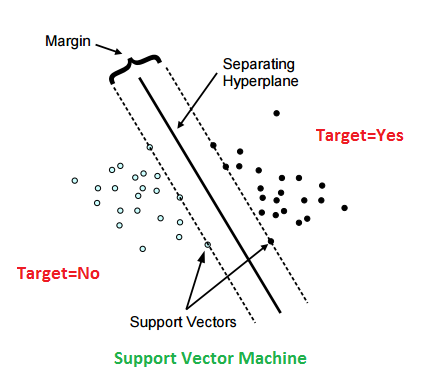

In [1]:
from IPython.display import Image
Image("SVM-Planes.png")

In fact we use the optimization of maximizing the margin to reduce the number of weights that are nonzero to just a few that correspond to the important features that ‘matter’ in deciding the separating line(hyperplane), these nonzero weights correspond to the support vectors (because they ‘support’ the separating hyperplane).


The most powerful concept that causes the effectivenss of SVM is the kernal method. Kernel in the SVM is responsible for transforming the input data into the required format (from the non linear non seperable space to a linear space where seperating the points using a linear line is done). There are many kernal types to choose from, i.e. linear, polynomial and radial basis function (RBF). For creating a non-linear hyperplane, we use RBF and Polynomial function (as shown below) .. 


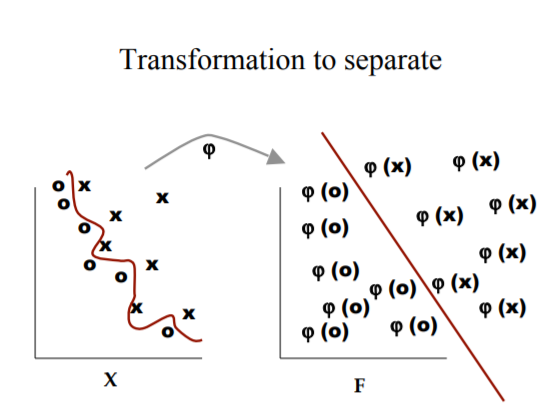

In [6]:
from IPython.display import Image
Image("SVM3.png")

This basically states that if each training observation is above or below the separating hyperplane, according to the geometric equation which defines the plane, then its associated class label will be +1 or −1. Thus we have developed a simple classification process. We assign a test observation to a class depending upon which side of the hyperplane it is located on. 

In general the algorithm of SVM is as follows:

1. Choose a kernel function
2. Choose a value for C (that control the trade off between smooth decision boundary and classifying training points)
3. Solve the quadratic programming problem (below)
4. Construct the discriminant function from the support vectors

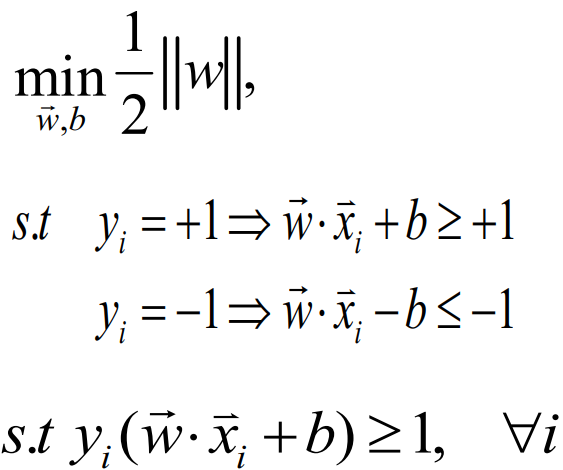

In [8]:
from IPython.display import Image
Image("SVM4.png")

## 2. Applications of SVM:

Due to the power of SVM, it can be used in many applications and many industries, i.e. Face Detection, Handwritting Recongnition, Bioinformatics, and many more! .. 

In fact, SVM proved its superiority over many machine learning algorithms (including neural networks) for many years (especially before proposing deep learning) 

## 3. Pros and Cons of SVM:

### 3.1. Pros:
1. SVM guarantes the optimality (the generated solution will always be global minimum not a local minimum).
2. It can be used for linearly separable as well as non-linearly separable data. 
3. SVM is very powerful in solving the high dimentional problems with the help of its kernal types.
4. SVMs provide compliance to the semi-supervised learning models. It can be used in areas where the data is labeled as well as unlabeled (it only requires a condition to the minimization problem which is known as the Transductive SVM).
5. With the help of Kernel Trick, SVM can carry out the feature mapping using simple dot product.

### 3.2. Cons:
1. Vanilla SVM cannot return the probabilistic confidence value that is similar to logistic regression. 
2. Choice of the kernel type is perhaps the biggest limitation of the support vector machine. 
3. SVM is a parametric method that depends on many parameters that dramatically infleunce its behavior (i.e. C, and Gamma) 

## 4. SVM's Implementation in Python

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  #data_split
from sklearn.svm import SVC  #SVM
from sklearn.metrics import classification_report, confusion_matrix  #model eval

%matplotlib inline

In [2]:
bankdata = pd.read_csv("bill_authentication.csv")
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Here we have 4 indepedent variables and single dependent variable (Class) that we gonna classifiy using SVM ..

In [8]:
X = bankdata.iloc[:, :-1].values
y = bankdata.iloc[:, 4].values

Let's check possible value of the class variable .. 

In [9]:
bankdata['Class'].unique()

array([0, 1], dtype=int64)

all possible values of the class .. either 0 or 1

### Data Split

Here we gonna use 80-20 split .. 

however, you might use another type (i.e. 70-30, or 10-fold cross validation) .. 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## Modeling using SVM:

- We gonna utilize the built in function entitled SVC() from sklearn library
- This is a model training phase using the funtion fit()

In [12]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Here we use "linear" kernal .. meanwhile, you might use non-linear kernal if you have more complex dataset to obtain better results .. 

You can read more about SVM through the following link .. 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

### Prediction phase:

This is the model testing phase .. using the function predict() 

In [14]:
y_pred = svclassifier.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

These are the class values corresponding to each input in the test dataset .. 

Did our model perform well ?! .. 

Let's evalaute it ! 

Usually, in regression tasks we evaluate the models via calculating the error (i.e. mean squared error) .. 
and in classification tasks .. the performance of the algorithm is done using confusion martrix and accuracy ..

Hence, let's check the confusion matrix of our SVM algorithm .. 

In [18]:
print(confusion_matrix(y_test,y_pred))

[[149   2]
 [  0 124]]


In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       151
           1       0.98      1.00      0.99       124

   micro avg       0.99      0.99      0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



Perfect! .. 

The model performed good! .. 
its percision in the case of 0 class is 100% .. which means that it correctly classified those cases .. however, it fails to correctly classify two values from the 1 class! and obtain and percision of 98%

You can try to use another kernal type and compare its results with the linear kernal to check if the model is performing well or not!